# SIMPLE LINEAR REGRESSION

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

# Loading Data

In [2]:
data = pd.read_csv('../input/salary-data-simple-linear-regression/Salary_Data.csv')
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [4]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


# Plotting Data

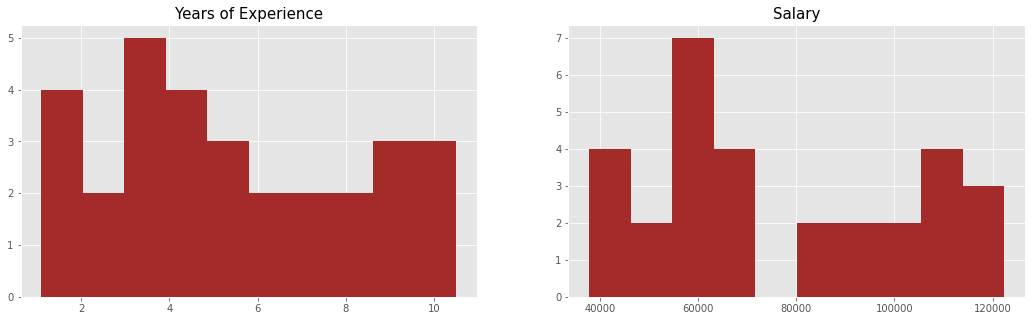

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(18, 5))
ax[0].set_title('Years of Experience', fontsize=15)
ax[0].hist(data.YearsExperience, color='brown')
ax[1].set_title('Salary', fontsize=15)
ax[1].hist(data.Salary, color='brown')
plt.show()

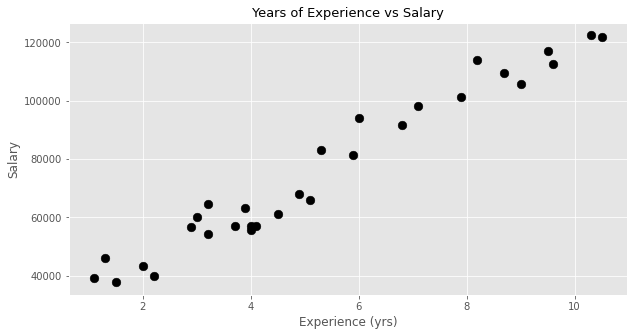

In [6]:
plt.figure(figsize=(10,5))
plt.title('Years of Experience vs Salary', fontsize=13)
plt.xlabel('Experience (yrs)', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.scatter(data.YearsExperience, data.Salary, s=75, color='black')
plt.show()

# Simple Regression Model

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score 

## Creating Training & Testing Set

In [8]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [9]:
col = ['X_train', 'X_test', 'y_train', 'y_test']
data = [X_train, X_test, y_train, y_test]
for i in range(len(col)):
    print(f'Shape of {col[i]}: {data[i].shape}')

Shape of X_train: (22, 1)
Shape of X_test: (8, 1)
Shape of y_train: (22,)
Shape of y_test: (8,)


## Plotting Dataset Distribution

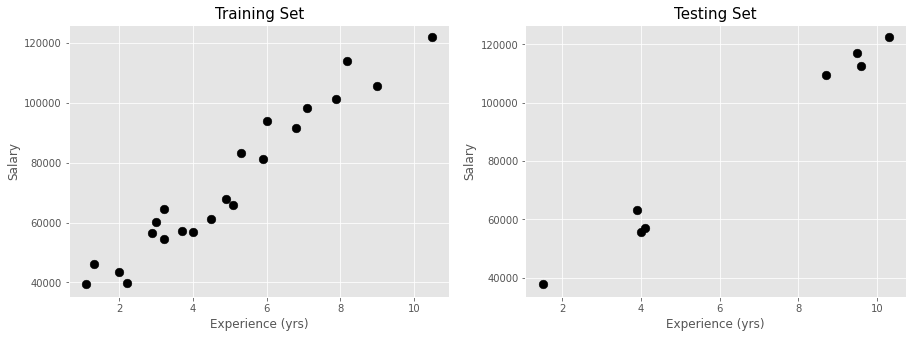

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].set_title('Training Set', fontsize=15)
ax[0].scatter(X_train, y_train, s=75, color='black')
ax[0].set_xlabel('Experience (yrs)')
ax[0].set_ylabel('Salary')
ax[1].set_title('Testing Set', fontsize=15)
ax[1].scatter(X_test, y_test, s=75, color='black')
ax[1].set_xlabel('Experience (yrs)')
ax[1].set_ylabel('Salary')
plt.show()

## Modeling & Fitting

In [11]:
regr = LinearRegression()
regr.fit(X_train, y_train)
print(f'Coefficients: {regr.coef_}')
print(f'Intercepts: {regr.intercept_}')

Coefficients: [9379.71049195]
Intercepts: 26986.691316737248


## Plotting Regression Line

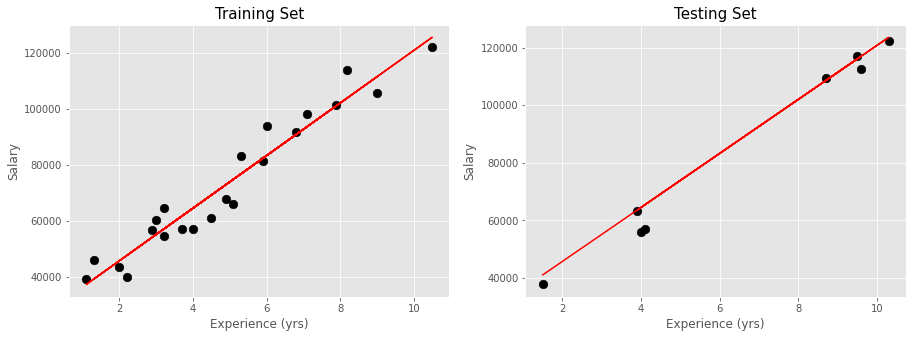

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].set_title('Training Set', fontsize=15)
ax[0].scatter(X_train, y_train, s=75, color='black')
ax[0].plot(X_train, regr.coef_*X_train + regr.intercept_, '-r')
ax[0].set_xlabel('Experience (yrs)')
ax[0].set_ylabel('Salary')
ax[1].set_title('Testing Set', fontsize=15)
ax[1].scatter(X_test, y_test, s=75, color='black')
ax[1].plot(X_test, regr.coef_*X_test + regr.intercept_, '-r')
ax[1].set_xlabel('Experience (yrs)')
ax[1].set_ylabel('Salary')
plt.show()

## Making Predictions

In [13]:
y_pred = np.round(regr.predict(X_test))
pd.DataFrame({'Years Experience': X_test[:,0], 'Actual Salary': y_test, 'Predicted Salary': y_pred})

,Years Experience,Actual Salary,Predicted Salary
0,1.5,37731.0,41056.0
1,10.3,122391.0,123598.0
2,4.1,57081.0,65444.0
3,3.9,63218.0,63568.0
4,9.5,116969.0,116094.0
5,8.7,109431.0,108590.0
6,9.6,112635.0,117032.0
7,4.0,55794.0,64506.0


## Evaluation

In [14]:
print(f'Mean Absolute Error(MAE): {mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 3508.75
Residual Sum of Squares(MSE): 22410025.25
R2-Score: 0.977918779028194


## Thank You!